

---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from scipy.stats.mstats import winsorize

/Users/sojeonglee/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# preprocessing_v1
- winsorize 시각화 부분은 실행 시간이 길어서 임시로 주석 처리했습니다

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# CSV 파일 불러오기
df = pd.read_csv('train.csv')
df.head()

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,data_channel,weekday,shares,y
0,17335,9.0,409.0,0.501326,1.0,0.587361,23.0,2.0,11.0,0.0,...,-0.1875,-0.1,0.50,0.500,0.00,0.500,Lifestyle,NaN,801,0
1,21242,10.0,317.0,0.725086,1.0,0.830097,6.0,3.0,NaN,21.0,...,-0.6000,NaN,0.00,0.000,0.50,0.000,Lifestyle,Tuesday,426,0
2,9448,11.0,447.0,0.584091,1.0,0.730104,NaN,1.0,1.0,1.0,...,-0.5000,-0.1,0.75,0.125,0.25,0.125,World,Friday,2400,1
3,36797,13.0,143.0,0.638298,NaN,0.787500,3.0,2.0,NaN,0.0,...,0.0000,0.0,1.00,NaN,0.50,0.500,Social Media,NaN,1100,0
4,29504,17.0,576.0,0.524412,1.0,0.714286,8.0,3.0,NaN,0.0,...,-1.0000,-0.1,0.00,0.000,0.50,0.000,World,Wednesday,1500,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22200 entries, 0 to 22199
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            22200 non-null  int64  
 1   n_tokens_title                20000 non-null  float64
 2   n_tokens_content              20054 non-null  float64
 3   n_unique_tokens               19942 non-null  float64
 4   n_non_stop_words              20017 non-null  float64
 5   n_non_stop_unique_tokens      19944 non-null  float64
 6   num_hrefs                     19967 non-null  float64
 7   num_self_hrefs                19920 non-null  float64
 8   num_imgs                      19986 non-null  float64
 9   num_videos                    19906 non-null  float64
 10  average_token_length          19987 non-null  float64
 11  num_keywords                  19955 non-null  float64
 12  kw_min_min                    19984 non-null  float64
 13  k

In [4]:
df.describe()

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,y
count,22200.000000,20000.000000,20054.000000,19942.000000,20017.000000,19944.000000,19967.000000,19920.000000,19986.000000,19906.000000,...,20033.000000,19916.000000,19926.000000,19997.000000,19928.000000,19967.000000,19934.000000,19951.000000,22200.000000,22200.000000
mean,19856.270045,10.387150,543.920614,0.530611,0.970175,0.672893,10.840337,3.303263,4.473431,1.248669,...,0.755952,-0.259972,-0.523223,-0.107647,0.284772,0.070169,0.342966,0.155305,3459.794865,0.495676
std,11469.556277,2.105585,460.694982,0.138709,0.170108,0.155004,11.024976,3.944523,8.092647,4.087507,...,0.248262,0.127974,0.289365,0.096059,0.327151,0.264686,0.188498,0.225603,12767.254516,0.499993
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,22.000000,0.000000
25%,9948.750000,9.000000,246.000000,0.471005,1.000000,0.626836,4.000000,1.000000,1.000000,0.000000,...,0.600000,-0.329167,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,948.000000,0.000000
50%,19931.000000,10.000000,409.000000,0.539683,1.000000,0.691228,7.000000,3.000000,1.000000,0.000000,...,0.800000,-0.253718,-0.500000,-0.100000,0.144444,0.000000,0.500000,0.000000,1400.000000,0.000000
75%,29780.250000,12.000000,715.750000,0.609865,1.000000,0.754545,14.000000,4.000000,4.000000,1.000000,...,1.000000,-0.187500,-0.300000,-0.050000,0.500000,0.138600,0.500000,0.250000,2800.000000,1.000000
max,39644.000000,19.000000,7413.000000,1.000000,1.000000,1.000000,186.000000,116.000000,108.000000,91.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000,1.000000


## 데이터 전처리

/Users/sojeonglee/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 20000.0)

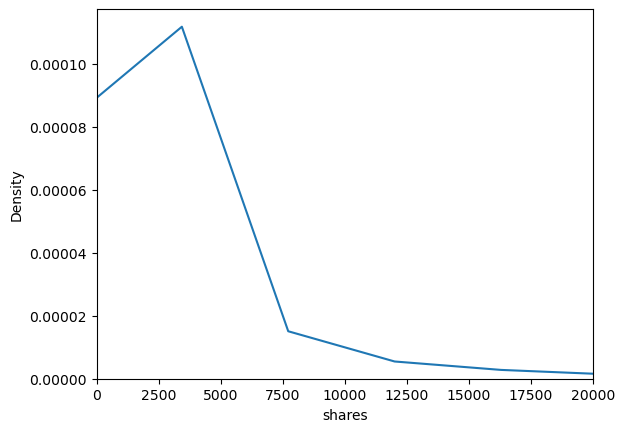

In [5]:
# 공유 수 분포 그래프
sns.kdeplot(df['shares'])
plt.xlim(0, 20000)

In [6]:
# 이상치 제거 비율에 따른 수치 통계

from scipy.stats import skew, kurtosis

quantiles = [1.0, 0.998, 0.995, 0.99, 0.98, 0.975]
summary_list = []

for q in quantiles:
    threshold = df['shares'].quantile(q)
    temp = df[df['shares'] <= threshold]['shares']

    summary = {
        'quantile': q,
        'count': temp.count(),
        'mean': temp.mean(),
        'std': temp.std(),
        'skew': skew(temp),
        'kurtosis': kurtosis(temp),
        'min': temp.min(),
        'max': temp.max()
    }

    summary_list.append(summary)

summary_df = pd.DataFrame(summary_list)
print(summary_df)


   quantile  count         mean           std       skew     kurtosis  min  \
0     1.000  22200  3459.794865  12767.254516  34.564296  1777.645277   22   
1     0.998  22155  3075.768269   5730.182933   6.628787    59.428030   22   
2     0.995  22090  2891.559439   4596.721530   5.102655    34.846652   22   
3     0.990  21978  2694.451224   3655.563807   3.813214    18.020655   22   
4     0.980  21760  2468.876333   2873.139893   3.020613    10.499472   22   
5     0.975  21648  2384.638258   2629.522184   2.816273     8.936662   22   

      max  
0  843300  
1   86200  
2   53100  
3   32100  
4   20400  
5   17300  


quantile = 0.98 에서 mean, std, skew(첨도), kurtosis(왜도)의 급격한 변화가 관찰된다. 따라서 shares가 상위 2%에 해당하는 데이터를 이상치로 간주하고 제거한다.

/Users/sojeonglee/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 8500.0)

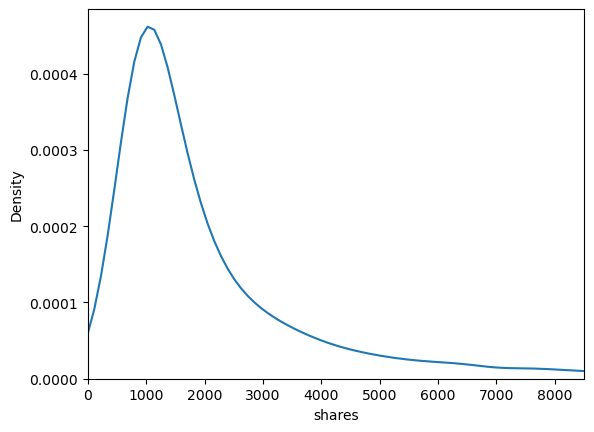

In [7]:
threshold = df['shares'].quantile(0.98)
df = df[df['shares'] <= threshold]

sns.kdeplot(df['shares'])
plt.xlim(0, 8500)

In [8]:
# 가장 많이 등장한 값이 전체에서 차지하는 비율 top 10
top_ratio_dict = {}

for col in df.columns:
    most_common = df[col].value_counts(dropna=False).iloc[0]
    total = len(df)
    ratio = most_common / total
    top_ratio_dict[col] = ratio

top_10 = sorted(top_ratio_dict.items(), key=lambda x: x[1], reverse=True)[:10]

for col, ratio in top_10:
    print(f"{col}: {ratio:.2%}")

kw_max_max: 68.35%
num_videos: 56.65%
kw_min_min: 51.76%
y: 51.45%
abs_title_subjectivity: 46.69%
title_sentiment_polarity: 45.63%
abs_title_sentiment_polarity: 45.57%
num_imgs: 41.48%
title_subjectivity: 40.89%
kw_min_avg: 38.98%


In [9]:
# 중복 값이 많은 변수들을 자세히 살펴보자
df['kw_min_min'].value_counts(dropna=False).head(5)

kw_min_min
-1.0      11263
 4.0       5955
 217.0     2323
 NaN       2167
 0.0         34
Name: count, dtype: int64

In [10]:
df['kw_max_max'].value_counts(dropna=False).head(5)

kw_max_max
843300.0    14873
NaN          2193
690400.0     1982
617900.0     1115
69100.0       645
Name: count, dtype: int64

In [11]:
df['n_non_stop_words_rounded'] = df['n_non_stop_words'].round(3)  # 소수 셋째 자리까지 반올림
df['n_non_stop_words_rounded'].value_counts(dropna=False)

n_non_stop_words_rounded
1.0    19041
NaN     2139
0.0      580
Name: count, dtype: int64

In [12]:
# 많은 값들이 같은 값을 가지므로 삭제한다
df.drop(columns=['kw_min_min'], axis=1, inplace=True)
df.drop(columns=['kw_max_max'], axis=1, inplace=True)
df.drop(columns=['n_non_stop_words'], axis=1, inplace=True)
df.drop(columns=['n_non_stop_words_rounded'], axis=1, inplace=True)

In [13]:
# 'id'는 각 샘플마다 고유한 값을 가진다. 학습에 사용할 값이 아니므로 삭제한다
df.drop(columns=['id'], axis=1, inplace=True)

In [14]:
# # Scatter plot

X = df.drop(columns=['shares', 'y'])
X = X.select_dtypes(include=['number']) # 숫자형만 필터링
y = df['shares']
target = 'shares'

# # 시각화
# plt.figure(figsize=(18, 20))

# for i, feature in enumerate(X.columns):
#     plt.subplot(7, 6, i + 1)
#     plt.tight_layout(pad=1.5)
#     plt.scatter(X[feature], y, alpha=0.3)
#     plt.xlabel(feature)
#     plt.ylabel(target)

# plt.tight_layout()
# plt.show()

In [15]:
# winsorize
from scipy.stats.mstats import winsorize
feature_with_outliers = ["n_tokens_content", "num_hrefs", "num_self_hrefs", "num_imgs", "num_videos", "kw_max_min", "kw_avg_min", "kw_max_avg", "kw_avg_avg", "self_reference_min_shares", "self_reference_max_shares", "self_reference_avg_sharess", "global_rate_positive_words", "global_rate_negative_words", "avg_positive_polarity", "min_positive_polarity"]

# Define the percentile thresholds for Winsorization
lower_percentile = 0.0
upper_percentile = 0.0002

# Apply Winsorization to each input variable
for feature in X.columns:
    if feature in feature_with_outliers:
      X[feature] = winsorize(X[feature], limits=(lower_percentile, upper_percentile))


In [16]:
# 요일별 shares의 평균, 최댓값, 최솟값
weekday_stats = df.groupby('weekday')['shares'].agg(
    avg_shares=lambda x: round(x.mean(), 2),
    max_shares='max',
    min_shares='min'
).reset_index()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_stats['weekday'] = pd.Categorical(weekday_stats['weekday'], categories=weekday_order, ordered=True)
weekday_stats = weekday_stats.sort_values('weekday')
print(weekday_stats)

     weekday  avg_shares  max_shares  min_shares
1     Monday     2384.82       20300          43
5    Tuesday     2355.24       20400          42
6  Wednesday     2354.53       20300          48
4   Thursday     2357.35       20400          22
0     Friday     2436.35       20400          28
2   Saturday     3117.37       19800          49
3     Sunday     3060.14       20000         171


In [17]:
# 결측치 처리
for col in df.columns:
    if df[col].dtype == 'object': # 범주형 → 최빈값
        df[col] = df[col].fillna(df[col].mode())
    else: # 숫자형 → 중간값
        df[col] = df[col].fillna(df[col].median())

In [18]:
# is_weekend 변수 추가
df['is_weekend'] = df['weekday'].isin(['Saturday', 'Sunday']).astype(int)

# 범주형 데이터 One-Hot Encoding
df = pd.get_dummies(df, columns=['data_channel', 'weekday'], drop_first=True)



---



# RandomForest_gscv_v0
해주신 것:
- shares 너무 높은 것 outlier로 판단해 삭제
- winsorize
- 겹치는 값이 많은 변수들 3개, id 삭제
- is_weekend 추가
- 결측치 채우기
- categorical 변수들 one-hot encoding
- 결과물은 df에 담겨 있음 <a/></a>

해야 할 것:
- train과 validation set 나누기
- 정규화
- classification 모델 선정
 - (패인 랩세션 4-1 참고) RandomForestclassifier 모델로 GridSearchCV를 해보자. (k-fold 활용)
 - GridSearchCV 내부에서 커스텀 평가지표 "(Accuracy + F1 score + AUC) / 3"을 사용하게끔 만들기

## 전처리 (train, val 나누기) (정규화)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21760 entries, 0 to 22199
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   n_tokens_title                21760 non-null  float64
 1   n_tokens_content              21760 non-null  float64
 2   n_unique_tokens               21760 non-null  float64
 3   n_non_stop_unique_tokens      21760 non-null  float64
 4   num_hrefs                     21760 non-null  float64
 5   num_self_hrefs                21760 non-null  float64
 6   num_imgs                      21760 non-null  float64
 7   num_videos                    21760 non-null  float64
 8   average_token_length          21760 non-null  float64
 9   num_keywords                  21760 non-null  float64
 10  kw_max_min                    21760 non-null  float64
 11  kw_avg_min                    21760 non-null  float64
 12  kw_min_max                    21760 non-null  float64
 13  kw_avg

In [20]:
from sklearn.model_selection import train_test_split

# X, y 분리
X = df.drop(columns=['shares', 'y'])
y = df['y']
print(X.shape);print(y.shape)

# X_train, X_val, y_train, y_val 나누기
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)
print(X_train.shape)

(21760, 53)
(21760,)
(17408, 53)


In [21]:
# 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [22]:
X_train_scaled  # np.array 형태

array([[-0.67501388,  0.97718631, -0.11005713, ..., -0.44199332,
        -0.45170708,  2.19149873],
       [-0.17534804, -0.0723073 ,  0.02973369, ..., -0.44199332,
        -0.45170708, -0.45630873],
       [-0.67501388, -0.26708232,  0.03335424, ..., -0.44199332,
         2.21382406, -0.45630873],
       ...,
       [-0.17534804, -0.56955646,  0.48911828, ..., -0.44199332,
        -0.45170708, -0.45630873],
       [ 2.32298119, -0.85828177,  0.77210477, ..., -0.44199332,
        -0.45170708,  2.19149873],
       [ 0.32431781, -0.54435028,  0.42473347, ...,  2.26247761,
        -0.45170708, -0.45630873]])

## 모델 학습시키기

## random forest

In [23]:
# 전처리가 완료된 후, 실제 모델 학습 부분
# X, y 분리
X = df.drop(columns=['shares', 'y'])
y = df['y']

# train/val 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

# 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 커스텀 평가 지표 정의
def my_scorer(estimator, X, y_true):
    y_pred = estimator.predict(X)
    y_proba = estimator.predict_proba(X)
    
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba[:, 1])
    
    result = (accuracy + f1 + roc_auc) / 3
    return result

# KFold 설정
random_state = 42
kf = KFold(n_splits=5, shuffle=True, random_state=random_state)

In [24]:
# 1. Random Forest 모델
print("=" * 50)
print("Random Forest 모델 학습 중...")
print("=" * 50)

rf_model = RandomForestClassifier(random_state=random_state, n_jobs=-1)

rf_param_grid = {
    "n_estimators": [100, 200],
    "max_features": ["sqrt", "log2"],
    "max_depth": [None, 10, 20]
}

rf_scoring = {
    "Accuracy": make_scorer(accuracy_score), 
    "F1 score": make_scorer(f1_score), 
    "AUC": "roc_auc", 
    "My score": my_scorer
}

rf_grid = GridSearchCV(
    rf_model, 
    rf_param_grid, 
    cv=kf, 
    scoring=rf_scoring, 
    refit="My score", 
    verbose=1
)

rf_grid.fit(X_train_scaled, y_train)
print(f"Random Forest Best parameters: {rf_grid.best_params_}")
print(f"Random Forest Best CV score: {rf_grid.best_score_:.6f}")

Random Forest 모델 학습 중...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Random Forest Best parameters: {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200}
Random Forest Best CV score: 0.666832


## xg boost

In [25]:
print("\n" + "=" * 50)
print("XGBoost 모델 학습 중...")
print("=" * 50)

xgb_model = xgb.XGBClassifier(
    random_state=random_state,
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1
)

xgb_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 6, 9],
    "learning_rate": [0.1, 0.3],
    "subsample": [0.8, 1.0]
}

xgb_scoring = {
    "Accuracy": make_scorer(accuracy_score), 
    "F1 score": make_scorer(f1_score), 
    "AUC": "roc_auc", 
    "My score": my_scorer
}

xgb_grid = GridSearchCV(
    xgb_model, 
    xgb_param_grid, 
    cv=kf, 
    scoring=xgb_scoring, 
    refit="My score", 
    verbose=1
)

xgb_grid.fit(X_train_scaled, y_train)
print(f"XGBoost Best parameters: {xgb_grid.best_params_}")
print(f"XGBoost Best CV score: {xgb_grid.best_score_:.6f}")



XGBoost 모델 학습 중...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
XGBoost Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
XGBoost Best CV score: 0.667221


## light gbm

In [26]:
print("\n" + "=" * 50)
print("LightGBM 모델 학습 중...")
print("=" * 50)

lgb_model = lgb.LGBMClassifier(
    random_state=random_state,
    verbose=-1,
    n_jobs=-1
)

lgb_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, -1],
    "learning_rate": [0.1, 0.3],
    "num_leaves": [31, 127]
}

lgb_scoring = {
    "Accuracy": make_scorer(accuracy_score), 
    "F1 score": make_scorer(f1_score), 
    "AUC": "roc_auc", 
    "My score": my_scorer
}

lgb_grid = GridSearchCV(
    lgb_model, 
    lgb_param_grid, 
    cv=kf, 
    scoring=lgb_scoring, 
    refit="My score", 
    verbose=1
)

lgb_grid.fit(X_train_scaled, y_train)
print(f"LightGBM Best parameters: {lgb_grid.best_params_}")
print(f"LightGBM Best CV score: {lgb_grid.best_score_:.6f}")


LightGBM 모델 학습 중...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
LightGBM Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 127}
LightGBM Best CV score: 0.663663


# 성능 비교

In [27]:
print("\n" + "=" * 50)
print("모든 모델 성능 비교")
print("=" * 50)

models = {
    "Random Forest": rf_grid,
    "XGBoost": xgb_grid,
    "LightGBM": lgb_grid
}

results = []
for name, model in models.items():
    y_pred = model.predict(X_val_scaled)
    y_pred_proba = model.predict_proba(X_val_scaled)[:, 1]
    
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred_proba)
    avg_score = (accuracy + f1 + auc) / 3
    
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "AUC": auc,
        "Average Score": avg_score
    })

# 결과를 DataFrame으로 출력
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))


모든 모델 성능 비교
        Model  Accuracy  F1 Score      AUC  Average Score
Random Forest  0.653263  0.635595 0.719163       0.669340
      XGBoost  0.654871  0.636672 0.716703       0.669415
     LightGBM  0.657169  0.639090 0.720760       0.672340


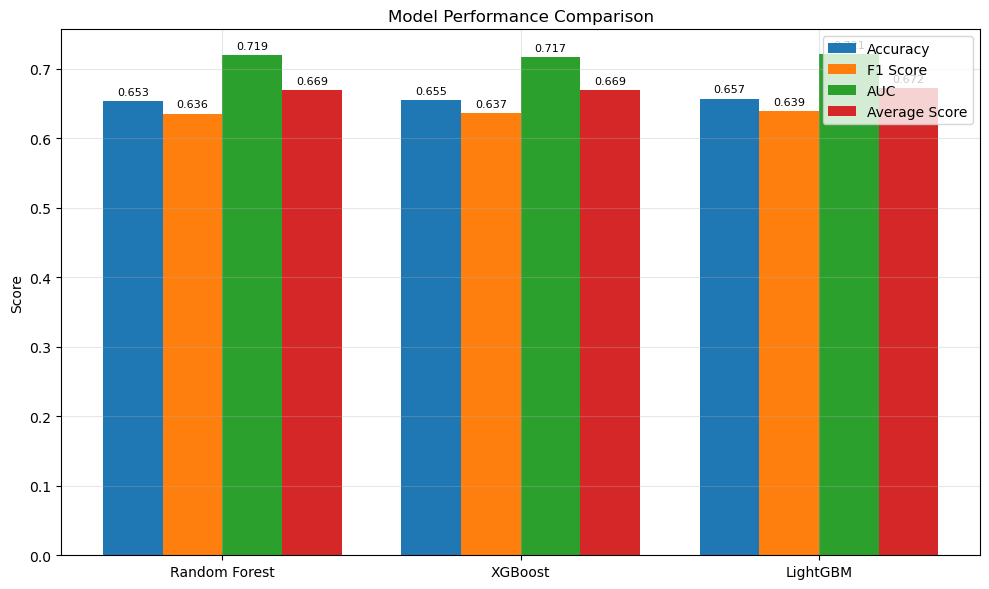

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
metrics = ["Accuracy", "F1 Score", "AUC", "Average Score"]
x = np.arange(len(models))
width = 0.2

for i, metric in enumerate(metrics):
    offset = (i - 1.5) * width
    bars = ax.bar(x + offset, results_df[metric], width, label=metric)
    
    # 값 표시
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(results_df["Model"])
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# best model ?


최고 성능 모델: LightGBM
최고 Average Score: 0.672340


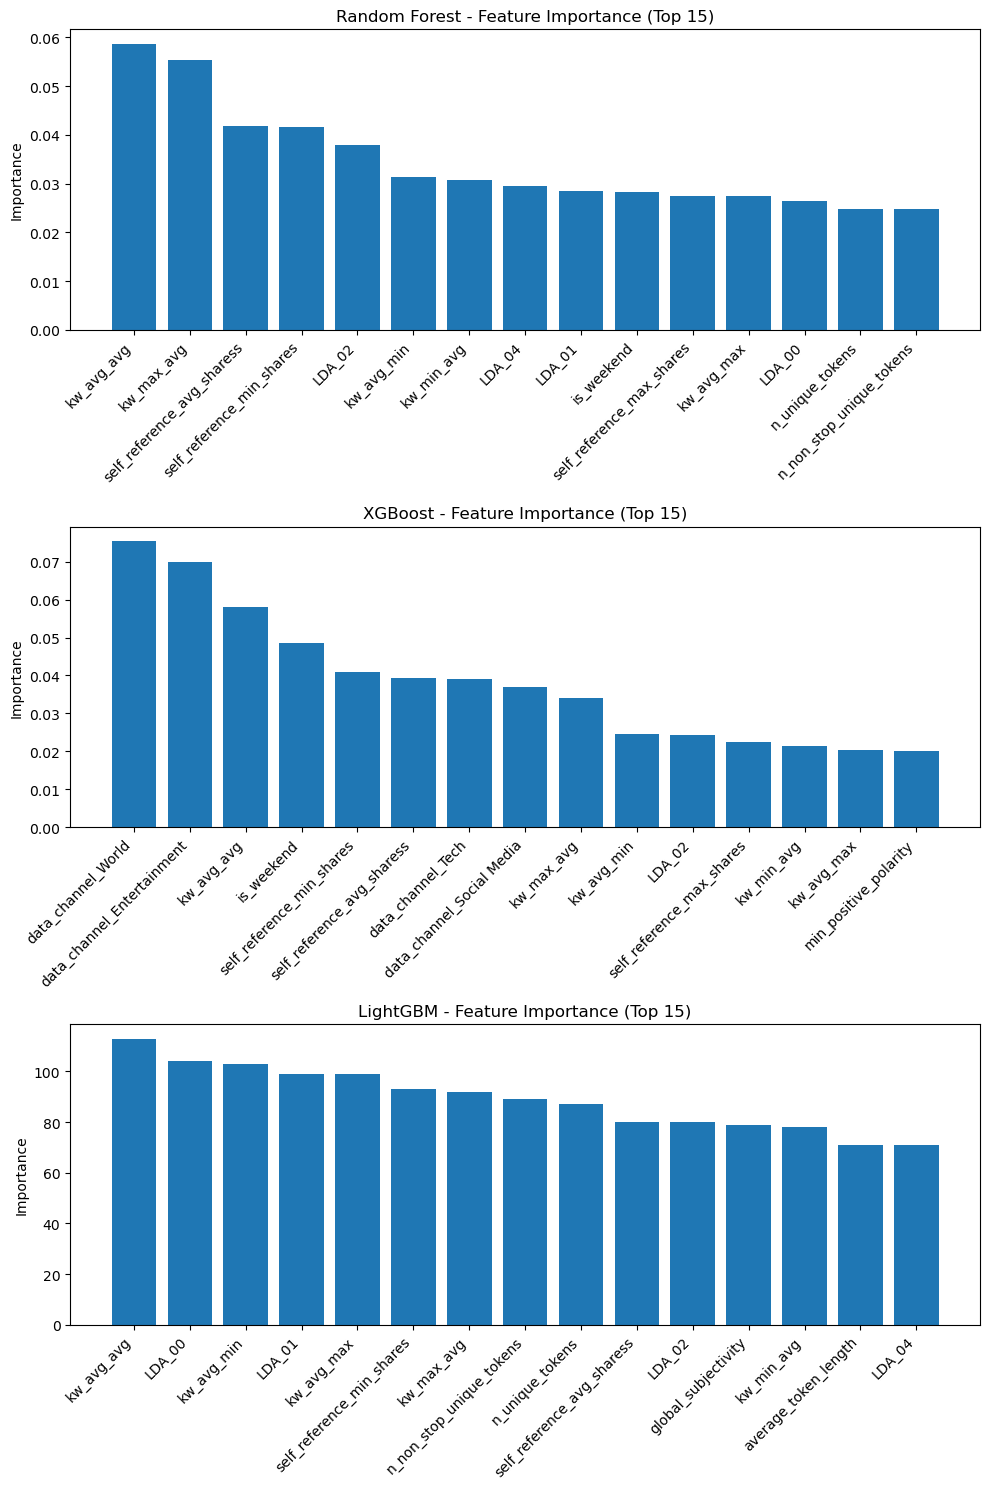

In [29]:
best_model_name = results_df.loc[results_df["Average Score"].idxmax(), "Model"]
best_score = results_df["Average Score"].max()

print(f"\n최고 성능 모델: {best_model_name}")
print(f"최고 Average Score: {best_score:.6f}")

# 특성 중요도 시각화 (모든 모델에 대해)
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
feature_names = X.columns

for idx, (name, model) in enumerate(models.items()):
    if hasattr(model.best_estimator_, 'feature_importances_'):
        importances = model.best_estimator_.feature_importances_
        indices = np.argsort(importances)[::-1][:15]  # 상위 15개 특성
        
        axes[idx].bar(range(len(indices)), importances[indices])
        axes[idx].set_xticks(range(len(indices)))
        axes[idx].set_xticklabels([feature_names[i] for i in indices], rotation=45, ha='right')
        axes[idx].set_title(f'{name} - Feature Importance (Top 15)')
        axes[idx].set_ylabel('Importance')

plt.tight_layout()
plt.show()

# ensemble
## hard voting

In [30]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

# 1. Voting Classifier (Hard Voting)
print("\n" + "=" * 50)
print("Voting Classifier (Hard Voting) 학습 중...")
print("=" * 50)

# 최적 파라미터로 각 모델 생성
rf_final = RandomForestClassifier(**rf_grid.best_params_, random_state=42, n_jobs=-1)
xgb_final = xgb.XGBClassifier(**xgb_grid.best_params_, random_state=42, use_label_encoder=False, eval_metric='logloss', n_jobs=-1)
lgb_final = lgb.LGBMClassifier(**lgb_grid.best_params_, random_state=42, verbose=-1, n_jobs=-1)

# Hard Voting
hard_voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_final),
        ('xgb', xgb_final),
        ('lgb', lgb_final)
    ],
    voting='hard'
)

hard_voting_clf.fit(X_train_scaled, y_train)


Voting Classifier (Hard Voting) 학습 중...


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=10,
                                                     max_features='log2',
                                                     n_estimators=200,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='loglo...
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('lgb',
                              LGBMClassifier(max_depth=5, n_jobs=-1,
                                             num_leaves=127, random_state=42,
                                             verbose=-1))])

## soft voting

In [31]:
# 2. Voting Classifier (Soft Voting)
print("\n" + "=" * 50)
print("Voting Classifier (Soft Voting) 학습 중...")
print("=" * 50)

soft_voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_final),
        ('xgb', xgb_final),
        ('lgb', lgb_final)
    ],
    voting='soft'
)

soft_voting_clf.fit(X_train_scaled, y_train)


Voting Classifier (Soft Voting) 학습 중...


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=10,
                                                     max_features='log2',
                                                     n_estimators=200,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='loglo...
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('lgb',
                              LGBMClassifier(max_depth=5, n_jobs=-1,
                                             num_leaves=127, random_state=42,
                                             verbose=-1))],
                 voting='soft')

## Stacking Classifier

In [32]:
print("\n" + "=" * 50)
print("Stacking Classifier 학습 중...")
print("=" * 50)

# 메타 모델로 로지스틱 회귀 사용
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', rf_final),
        ('xgb', xgb_final),
        ('lgb', lgb_final)
    ],
    final_estimator=LogisticRegression(random_state=42),
    cv=5,
    stack_method='predict_proba'
)

stacking_clf.fit(X_train_scaled, y_train)


Stacking Classifier 학습 중...


StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='log2',
                                                       n_estimators=200,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric...
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=-1,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('lgb',
                                LGBMClassifier(max_depth=5, n_jobs=-1,
                                               num_leaves=127, random_state=42,
                                               verbose=-1))],
                   final_estimator=LogisticRegression(random_state=42),
                   stack_method='predict_proba')

## Custom Weighted Voting

In [33]:
print("\n" + "=" * 50)
print("Custom Weighted Voting 구현 중...")
print("=" * 50)

# 각 모델을 학습
rf_final.fit(X_train_scaled, y_train)
xgb_final.fit(X_train_scaled, y_train)
lgb_final.fit(X_train_scaled, y_train)

# 가중치 설정 (성능에 비례하여)
# LightGBM > XGBoost > Random Forest 순으로 성능이 좋았으므로
weights = {
    'rf': 0.30,    # 가장 성능이 낮음
    'xgb': 0.35,   # 중간 성능
    'lgb': 0.35    # 가장 성능이 좋음
}

def weighted_voting_predict(X, models, weights):
    """가중치를 적용한 소프트 보팅"""
    predictions = []
    
    # 각 모델의 예측 확률 가져오기
    rf_proba = models['rf'].predict_proba(X)
    xgb_proba = models['xgb'].predict_proba(X)
    lgb_proba = models['lgb'].predict_proba(X)
    
    # 가중 평균 계산
    weighted_proba = (
        weights['rf'] * rf_proba +
        weights['xgb'] * xgb_proba +
        weights['lgb'] * lgb_proba
    )
    
    # 최종 예측
    final_predictions = np.argmax(weighted_proba, axis=1)
    
    return final_predictions, weighted_proba


Custom Weighted Voting 구현 중...


In [34]:
# 모든 앙상블 모델 평가
models_to_compare = {
    "Random Forest": rf_final,
    "XGBoost": xgb_final,
    "LightGBM": lgb_final,
    "Hard Voting": hard_voting_clf,
    "Soft Voting": soft_voting_clf,
    "Stacking": stacking_clf
}

# 결과 저장
ensemble_results = []

for name, model in models_to_compare.items():
    if name == "Custom Weighted":
        # 커스텀 가중 보팅은 별도로 처리
        continue
    else:
        y_pred = model.predict(X_val_scaled)
        
        # Hard Voting의 경우 predict_proba가 없으므로 별도 처리
        if name == "Hard Voting":
            # AUC 계산을 위해 개별 모델들의 확률값 평균 사용
            rf_proba = rf_final.predict_proba(X_val_scaled)[:, 1]
            xgb_proba = xgb_final.predict_proba(X_val_scaled)[:, 1]
            lgb_proba = lgb_final.predict_proba(X_val_scaled)[:, 1]
            y_pred_proba = (rf_proba + xgb_proba + lgb_proba) / 3
        else:
            y_pred_proba = model.predict_proba(X_val_scaled)[:, 1]
    
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred_proba)
    avg_score = (accuracy + f1 + auc) / 3
    
    ensemble_results.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "AUC": auc,
        "Average Score": avg_score
    })

In [35]:
# Custom Weighted Voting 평가
trained_models = {'rf': rf_final, 'xgb': xgb_final, 'lgb': lgb_final}
y_pred_weighted, y_pred_proba_weighted = weighted_voting_predict(X_val_scaled, trained_models, weights)

accuracy = accuracy_score(y_val, y_pred_weighted)
f1 = f1_score(y_val, y_pred_weighted)
auc = roc_auc_score(y_val, y_pred_proba_weighted[:, 1])
avg_score = (accuracy + f1 + auc) / 3

ensemble_results.append({
    "Model": "Custom Weighted",
    "Accuracy": accuracy,
    "F1 Score": f1,
    "AUC": auc,
    "Average Score": avg_score
})

# 결과 출력
print("\n" + "=" * 50)
print("모든 모델 성능 비교 (앙상블 포함)")
print("=" * 50)

ensemble_df = pd.DataFrame(ensemble_results)
print(ensemble_df.to_string(index=False))



모든 모델 성능 비교 (앙상블 포함)
          Model  Accuracy  F1 Score      AUC  Average Score
  Random Forest  0.653263  0.635595 0.719163       0.669340
        XGBoost  0.654871  0.636672 0.716703       0.669415
       LightGBM  0.657169  0.639090 0.720760       0.672340
    Hard Voting  0.657399  0.640982 0.723012       0.673798
    Soft Voting  0.659697  0.643733 0.723012       0.675481
       Stacking  0.659697  0.645099 0.722592       0.675796
Custom Weighted  0.658778  0.642943 0.722896       0.674872



개별 모델 평균 성능: 0.670365
앙상블 모델 평균 성능: 0.674987
성능 향상: 0.004622


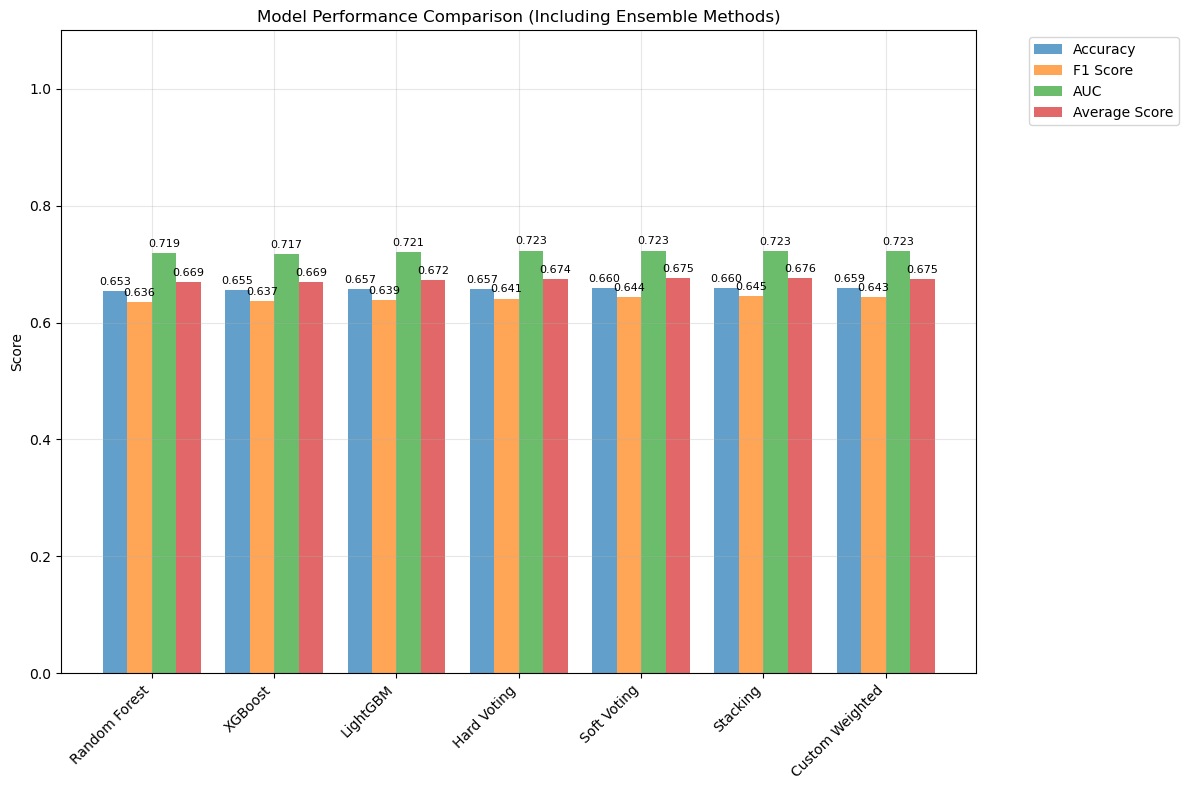

In [36]:
# 성능 향상 분석
base_avg = ensemble_df[ensemble_df["Model"].isin(["Random Forest", "XGBoost", "LightGBM"])]["Average Score"].mean()
ensemble_avg = ensemble_df[ensemble_df["Model"].isin(["Hard Voting", "Soft Voting", "Stacking", "Custom Weighted"])]["Average Score"].mean()

print(f"\n개별 모델 평균 성능: {base_avg:.6f}")
print(f"앙상블 모델 평균 성능: {ensemble_avg:.6f}")
print(f"성능 향상: {ensemble_avg - base_avg:.6f}")

# 시각화
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
metrics = ["Accuracy", "F1 Score", "AUC", "Average Score"]
x = np.arange(len(ensemble_results))
width = 0.2

colors = ['lightblue', 'lightgreen', 'lightcoral', 'gold', 'lightpink', 'lightgray', 'lightsalmon']

for i, metric in enumerate(metrics):
    offset = (i - 1.5) * width
    bars = ax.bar(x + offset, ensemble_df[metric], width, label=metric, alpha=0.7)
    
    # 값 표시
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison (Including Ensemble Methods)')
ax.set_xticks(x)
ax.set_xticklabels(ensemble_df["Model"], rotation=45, ha='right')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 1.1)

plt.tight_layout()
plt.show()

In [37]:
# 최고 성능 모델 선택
best_model_idx = ensemble_df["Average Score"].idxmax()
best_model_name = ensemble_df.loc[best_model_idx, "Model"]
best_score = ensemble_df.loc[best_model_idx, "Average Score"]

print(f"\n최고 성능 모델: {best_model_name}")
print(f"최고 Average Score: {best_score:.6f}")

# 최고 성능 모델이 앙상블 모델인 경우, 해당 모델을 최종 모델로 선택
if best_model_name == "Hard Voting":
    final_model = hard_voting_clf
elif best_model_name == "Soft Voting":
    final_model = soft_voting_clf
elif best_model_name == "Stacking":
    final_model = stacking_clf
elif best_model_name == "Custom Weighted":
    # Custom Weighted는 함수로 구현되어 있음
    final_model = "custom_weighted"
    print("Custom Weighted Voting이 최고 성능 모델입니다.")
    print("weighted_voting_predict 함수를 사용하여 예측하세요.")
else:
    final_model = models_to_compare[best_model_name]

# 앙상블 방법 설명
print("\n" + "=" * 50)
print("앙상블 방법 설명")
print("=" * 50)
print("1. Hard Voting: 다수결로 최종 클래스 결정")
print("2. Soft Voting: 각 모델의 확률값 평균으로 최종 클래스 결정")
print("3. Stacking: 기본 모델들의 예측을 메타 모델(로지스틱 회귀)의 입력으로 사용")
print("4. Custom Weighted: 각 모델의 성능에 비례한 가중치로 예측 확률 결합")


최고 성능 모델: Stacking
최고 Average Score: 0.675796

앙상블 방법 설명
1. Hard Voting: 다수결로 최종 클래스 결정
2. Soft Voting: 각 모델의 확률값 평균으로 최종 클래스 결정
3. Stacking: 기본 모델들의 예측을 메타 모델(로지스틱 회귀)의 입력으로 사용
4. Custom Weighted: 각 모델의 성능에 비례한 가중치로 예측 확률 결합


# fine tuning

In [38]:
# 1. 다양한 메타 모델로 Stacking 시도
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

print("=" * 50)
print("다양한 메타 모델로 Stacking 파인튜닝")
print("=" * 50)

# 다양한 메타 모델들
meta_models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

stacking_results = []

for meta_name, meta_model in meta_models.items():
    print(f"\n{meta_name}을 메타 모델로 사용한 Stacking 학습 중...")
    
    stacking_clf = StackingClassifier(
        estimators=[
            ('rf', rf_final),
            ('xgb', xgb_final),
            ('lgb', lgb_final)
        ],
        final_estimator=meta_model,
        cv=5,
        stack_method='predict_proba'
    )
    
    stacking_clf.fit(X_train_scaled, y_train)
    
    # 평가
    y_pred = stacking_clf.predict(X_val_scaled)
    y_pred_proba = stacking_clf.predict_proba(X_val_scaled)[:, 1]
    
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred_proba)
    avg_score = (accuracy + f1 + auc) / 3
    
    stacking_results.append({
        "Meta Model": meta_name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "AUC": auc,
        "Average Score": avg_score
    })

# 결과 출력
stacking_df = pd.DataFrame(stacking_results)
print("\n메타 모델별 Stacking 성능:")
print(stacking_df.to_string(index=False))

# 최고 성능 메타 모델 찾기
best_meta_idx = stacking_df["Average Score"].idxmax()
best_meta_name = stacking_df.loc[best_meta_idx, "Meta Model"]
best_meta_score = stacking_df.loc[best_meta_idx, "Average Score"]

print(f"\n최고 성능 메타 모델: {best_meta_name}")
print(f"최고 Average Score: {best_meta_score:.6f}")


다양한 메타 모델로 Stacking 파인튜닝

LogisticRegression을 메타 모델로 사용한 Stacking 학습 중...

GradientBoosting을 메타 모델로 사용한 Stacking 학습 중...

ExtraTrees을 메타 모델로 사용한 Stacking 학습 중...

SVM을 메타 모델로 사용한 Stacking 학습 중...

KNN을 메타 모델로 사용한 Stacking 학습 중...

MLP을 메타 모델로 사용한 Stacking 학습 중...

메타 모델별 Stacking 성능:
        Meta Model  Accuracy  F1 Score      AUC  Average Score
LogisticRegression  0.659697  0.645099 0.722592       0.675796
  GradientBoosting  0.657399  0.638195 0.720976       0.672190
        ExtraTrees  0.630974  0.606951 0.678841       0.638922
               SVM  0.658778  0.644482 0.700612       0.667957
               KNN  0.610983  0.594685 0.645415       0.617028
               MLP  0.660156  0.641975 0.722655       0.674929

최고 성능 메타 모델: LogisticRegression
최고 Average Score: 0.675796


In [41]:
# 2. 개별 모델 파인튜닝 (더 세밀한 그리드)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

print("\n" + "=" * 50)
print("개별 모델 파인튜닝 (더 세밀한 하이퍼파라미터)")
print("=" * 50)

# XGBoost 파인튜닝
print("\nXGBoost 파인튜닝 중...")
xgb_fine_params = {
    'n_estimators': [200, 300, 400],
    'max_depth': [5, 6, 7],
    'learning_rate': [0.05, 0.1, 0.15],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_fine_grid = GridSearchCV(
    xgb_model, 
    xgb_fine_params, 
    cv=kf, 
    scoring={'My score': my_scorer},
    refit="My score", 
    verbose=1,
    n_jobs=-1
)

xgb_fine_grid.fit(X_train_scaled, y_train)
print(f"XGBoost 파인튜닝 후 최고 성능: {xgb_fine_grid.best_score_:.6f}")
print(f"XGBoost 최적 파라미터: {xgb_fine_grid.best_params_}")

# light gbm
print("\nLightGBM 파인튜닝 중 (RandomizedSearch)...")

# 파라미터 범위를 넓게 주고, 일부만 샘플링
lgb_fine_params = {
    'n_estimators': randint(200, 401),
    'max_depth': randint(6, 13),
    'learning_rate': uniform(0.03, 0.12),  # 0.03 ~ 0.15
    'num_leaves': randint(80, 160),
    'feature_fraction': uniform(0.8, 0.2)  # 0.8 ~ 1.0
}

lgb_fine_search = RandomizedSearchCV(
    lgb_model,
    lgb_fine_params,
    n_iter=50,  # 시도할 조합 수
    cv=kf,
    scoring={'My score': my_scorer},
    refit='My score',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

lgb_fine_search.fit(X_train_scaled, y_train)
print(f"LightGBM 파인튜닝 후 최고 성능: {lgb_fine_search.best_score_:.6f}")
print(f"LightGBM 최적 파라미터: {lgb_fine_search.best_params_}")


개별 모델 파인튜닝 (더 세밀한 하이퍼파라미터)

XGBoost 파인튜닝 중...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/Users/sojeonglee/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/sojeonglee/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/sojeonglee/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/sojeonglee/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/sojeonglee/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: Us

XGBoost 파인튜닝 후 최고 성능: 0.668863
XGBoost 최적 파라미터: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}

LightGBM 파인튜닝 중 (RandomizedSearch)...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
LightGBM 파인튜닝 후 최고 성능: 0.665141
LightGBM 최적 파라미터: {'feature_fraction': 0.8488251044495548, 'learning_rate': 0.05019492506075167, 'max_depth': 6, 'n_estimators': 379, 'num_leaves': 141}


In [43]:
# 3. 파인튜닝된 모델들로 최종 Stacking
print("\n" + "=" * 50)
print("파인튜닝된 모델들로 최종 Stacking")
print("=" * 50)

# 파인튜닝된 모델들
rf_fine = RandomForestClassifier(**rf_grid.best_params_, random_state=42, n_jobs=-1)
xgb_fine = xgb.XGBClassifier(**xgb_fine_grid.best_params_, random_state=42, use_label_encoder=False, eval_metric='logloss', n_jobs=-1)
# lgb_fine = lgb.LGBMClassifier(**lgb_fine_grid.best_params_, random_state=42, verbose=-1, n_jobs=-1)
lgb_fine = lgb.LGBMClassifier(**lgb_fine_search.best_params_, random_state=42, verbose=-1, n_jobs=-1)


# 최고 성능 메타 모델 사용
final_stacking_clf = StackingClassifier(
    estimators=[
        ('rf', rf_fine),
        ('xgb', xgb_fine),
        ('lgb', lgb_fine)
    ],
    final_estimator=meta_models[best_meta_name],
    cv=5,
    stack_method='predict_proba'
)

final_stacking_clf.fit(X_train_scaled, y_train)

# 최종 평가
y_pred_final = final_stacking_clf.predict(X_val_scaled)
y_pred_proba_final = final_stacking_clf.predict_proba(X_val_scaled)[:, 1]

final_accuracy = accuracy_score(y_val, y_pred_final)
final_f1 = f1_score(y_val, y_pred_final)
final_auc = roc_auc_score(y_val, y_pred_proba_final)
final_avg_score = (final_accuracy + final_f1 + final_auc) / 3

print(f"\n최종 파인튜닝 결과:")
print(f"Accuracy: {final_accuracy:.6f}")
print(f"F1 Score: {final_f1:.6f}")
print(f"AUC: {final_auc:.6f}")
print(f"Average Score: {final_avg_score:.6f}")



파인튜닝된 모델들로 최종 Stacking

최종 파인튜닝 결과:
Accuracy: 0.661765
F1 Score: 0.645301
AUC: 0.724114
Average Score: 0.677060



성능 개선 비교


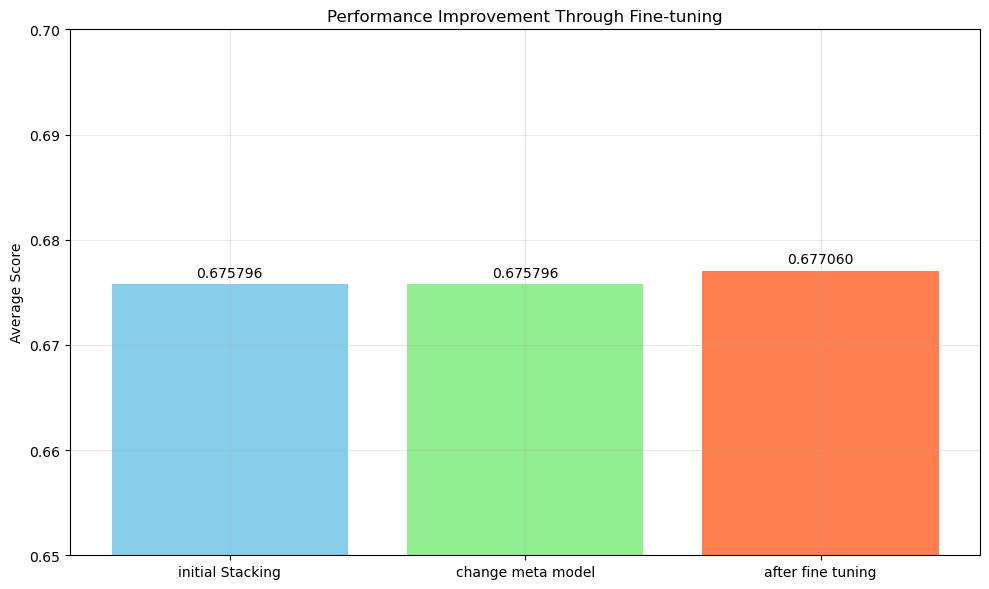


추가 개선 아이디어

1. Feature Engineering:
   - 키워드 관련 변수들의 조합 (예: kw_avg_avg / kw_max_avg)
   - 정서 분석 변수들의 조합 (예: positive_polarity - negative_polarity)
   - 시간 관련 특성 (주말 vs 평일의 영향 더 세밀하게)
   
2. 데이터 증강:
   - SMOTE를 사용한 오버샘플링
   - 클래스 불균형 처리
   
3. 더 복잡한 앙상블:
   - 두 단계 이상의 Stacking
   - Blending 기법
   - Ensemble of Ensembles
   
4. 하이퍼파라미터 최적화:
   - Bayesian Optimization
   - Optuna 등의 고급 최적화 도구 사용


최종 선택 모델: 파인튜닝된 Stacking (Average Score: 0.677060)


In [47]:
# 4. 성능 개선 정도 시각화
print("\n" + "=" * 50)
print("성능 개선 비교")
print("=" * 50)

improvement_data = [
    ["initial Stacking", 0.675796],
    ["change meta model", best_meta_score],
    ["after fine tuning", final_avg_score]
]

improvement_df = pd.DataFrame(improvement_data, columns=["Stage", "Average Score"])

plt.figure(figsize=(10, 6))
bars = plt.bar(improvement_df["Stage"], improvement_df["Average Score"], color=['skyblue', 'lightgreen', 'coral'])
plt.ylabel('Average Score')
plt.title('Performance Improvement Through Fine-tuning')
plt.ylim(0.65, 0.7)

# 값 표시
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.6f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Feature Engineering 제안
print("\n" + "=" * 50)
print("추가 개선 아이디어")
print("=" * 50)
print("""
1. Feature Engineering:
   - 키워드 관련 변수들의 조합 (예: kw_avg_avg / kw_max_avg)
   - 정서 분석 변수들의 조합 (예: positive_polarity - negative_polarity)
   - 시간 관련 특성 (주말 vs 평일의 영향 더 세밀하게)
   
2. 데이터 증강:
   - SMOTE를 사용한 오버샘플링
   - 클래스 불균형 처리
   
3. 더 복잡한 앙상블:
   - 두 단계 이상의 Stacking
   - Blending 기법
   - Ensemble of Ensembles
   
4. 하이퍼파라미터 최적화:
   - Bayesian Optimization
   - Optuna 등의 고급 최적화 도구 사용
""")

# 저장할 최종 모델 선정
if final_avg_score > best_meta_score:
    final_model = final_stacking_clf
    final_score = final_avg_score
    print(f"\n최종 선택 모델: 파인튜닝된 Stacking (Average Score: {final_score:.6f})")
else:
    final_model = StackingClassifier(
        estimators=[
            ('rf', rf_final),
            ('xgb', xgb_final),
            ('lgb', lgb_final)
        ],
        final_estimator=meta_models[best_meta_name],
        cv=5,
        stack_method='predict_proba'
    )
    final_score = best_meta_score
    print(f"\n최종 선택 모델: {best_meta_name} 메타 모델 Stacking (Average Score: {final_score:.6f})")